In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from IPython import display
display.set_matplotlib_formats('svg')

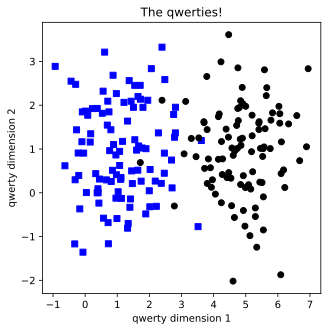

In [20]:
#create data
nPerCluster = 100
blur = 1

A = [1,1]
B = [5,1]

#generate data

a = [A[0]+np.random.randn(nPerCluster)* blur, A[1] + np.random.randn(nPerCluster) * blur]
b = [B[0]+np.random.randn(nPerCluster)* blur, B[1] + np.random.randn(nPerCluster) * blur]


#true labels

labels_np = np.vstack((np.zeros((nPerCluster,1)), np.ones((nPerCluster,1))))


#concatenate into a matirx
data_np = np.hstack((a,b)).T


#convert to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


#show data
fig = plt.figure(figsize = (5,5))
plt.plot(data[np.where(labels == 0)[0],0],  data[np.where(labels ==0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],  data[np.where(labels ==1)[0],1],'ko')

plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [21]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1), #input layer
    nn.ReLU(), #activation unit
    nn.Linear(1,1), # output unit
    nn.Sigmoid() #final activation

)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [22]:
#other model features

learningRate = 0.01

#loss function 

lossfun = nn.BCELoss()


optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [23]:
from torch.optim import optimizer
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward prop
  yhat = ANNclassify(data)


  #compute loss 
  loss = lossfun(yhat, labels)
  losses[epochi] = loss




  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



AttributeError: ignored

In [24]:
predictions = ANNclassify(data)

predlabels = predictions > 0.5

misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerCluster)

print('Final Accuracy : %g%%' %totalacc)

Final Accuracy : 39.5%


In [27]:
fig = plt.figure(figsize = (5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize =12, markeredgewidth)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(~predlabels)[0],1], 'ko')

plt.legend(['misclassified', 'blue', 'black'], bbox_to_anchor = (1,1))
plt.title(f'{totalacc}% correct')
plt.show()

SyntaxError: ignored